<a href="https://colab.research.google.com/github/armandoordonez/eda/blob/main/vino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# based on https://towardsdatascience.com/exploratory-data-analysis-in-python-a-step-by-step-process-d0dfa6bf94ee


# Data management
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# styles
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12,  6)

# use sklearn to import a dataset
from sklearn.datasets import load_wine

print("Libraries and dataset Ok!")


Libraries and dataset Ok!


In [5]:
# Load the dataset
wine = load_wine()

# Convertimos el dataset en dataframe
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)

# Creamos una columna para el target
df["vino"] = wine.target

#  the idea would then be to use the features of the wine to predict its type. 

# I. Understanding the big picture

In [6]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,vino
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [7]:
df.tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,vino
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0,2
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0,2


In [8]:
df.shape

(178, 14)

In [9]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,vino
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


# Preparation

are there any useless or redundant variables?
are there any duplicate columns?
does the nomenclature make sense?
are there any new variables we want to create?

In [11]:
# Duplicated variables?

df.duplicated().sum()

0

In [12]:
# Change names
df.rename(columns={"od280/od315_of_diluted_wines": "concentracion_proteinas"}, inplace=True)


In [ ]:
# linear / polynomial combination of the existing columns.

# II. Understanding of the variables

In [13]:
# univariate analysis.

df.vino.value_counts()

1    71
0    59
2    48
Name: vino, dtype: int64

In [14]:
df.vino.value_counts("normalize = True")

1    0.398876
0    0.331461
2    0.269663
Name: vino, dtype: float64

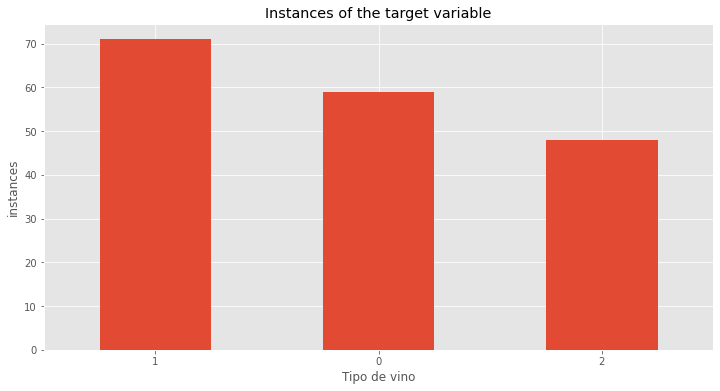

In [17]:
df.vino.value_counts().plot(kind="bar")
plt.title("Instances of the target variable")
plt.xlabel("Tipo de vino")
plt.xticks(rotation=0)
plt.ylabel("instances")
plt.show()

In [ ]:
# Balanced?

In [18]:
# Numeric variables

df.magnesium.describe()

count    178.000000
mean      99.741573
std       14.282484
min       70.000000
25%       88.000000
50%       98.000000
75%      107.000000
max      162.000000
Name: magnesium, dtype: float64

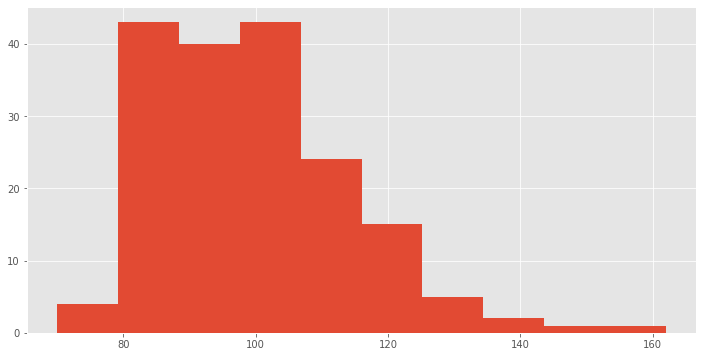

In [19]:
df.magnesium.hist()

In [20]:
print(f"Skewness: {df['magnesium'].skew()}")
print(f"Kurtosis: {df['magnesium'].kurt()}")

Skewness: 1.098191054755161
Kurtosis: 2.1049913235905557


# III: Relationships between variables

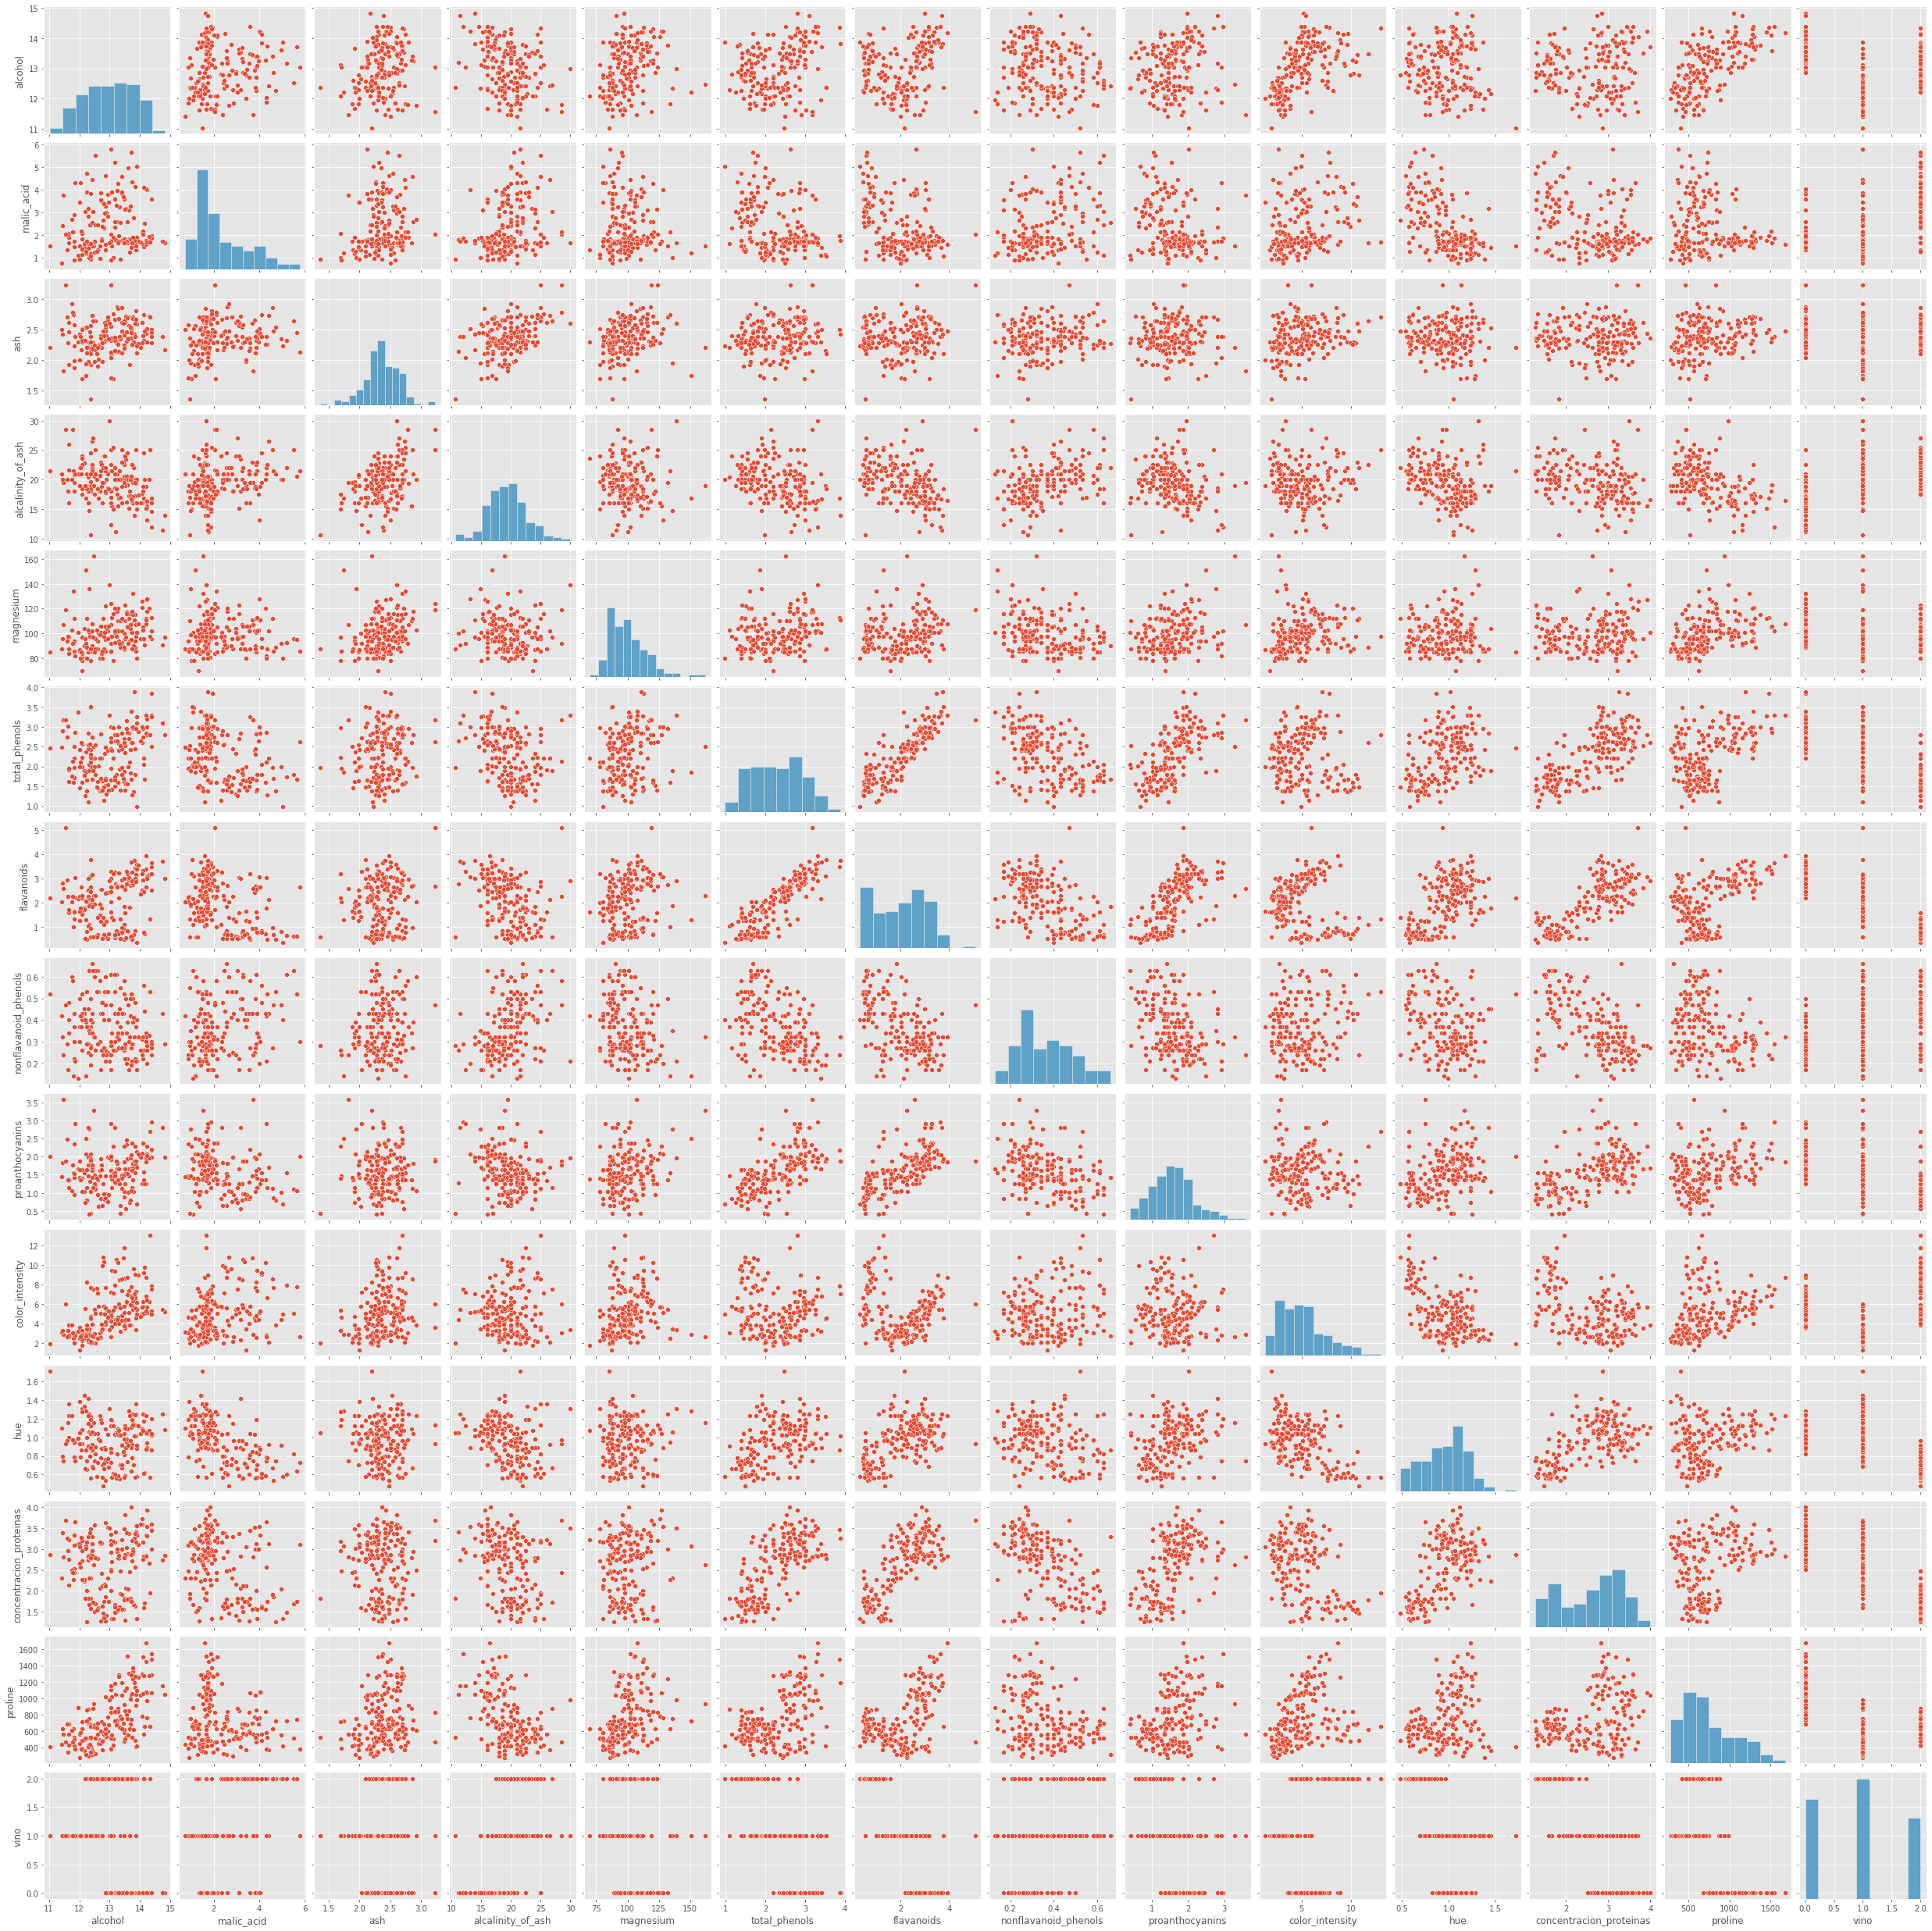

In [21]:
sns.pairplot(df)

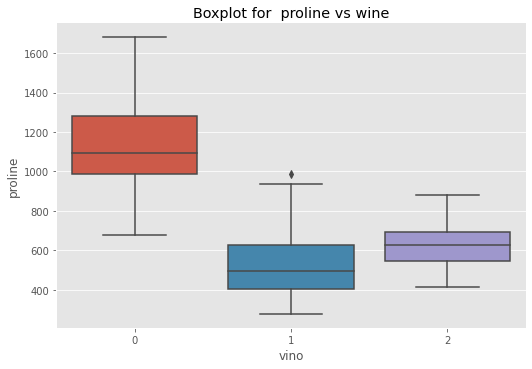

In [24]:
sns.catplot(x="vino", y="proline", data=df, kind="box", aspect=1.5)
plt.title("Boxplot for  proline vs wine")
plt.show()

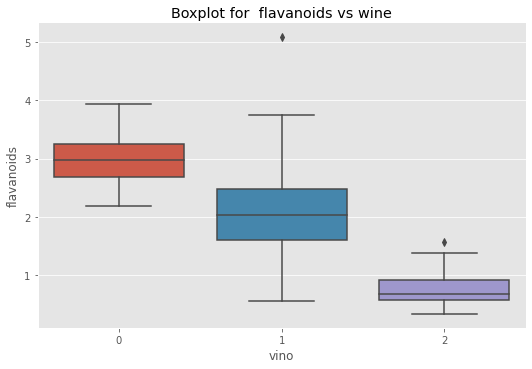

In [25]:
sns.catplot(x="vino", y="flavanoids", data=df, kind="box", aspect=1.5)
plt.title("Boxplot for  flavanoids vs wine")
plt.show()

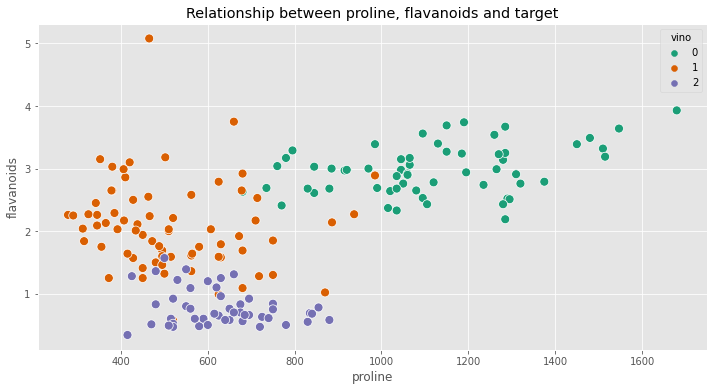

In [26]:
sns.scatterplot(x="proline", y="flavanoids", hue="vino", data=df, palette="Dark2", s=80)
plt.title("Relationship between proline, flavanoids and target")
plt.show()

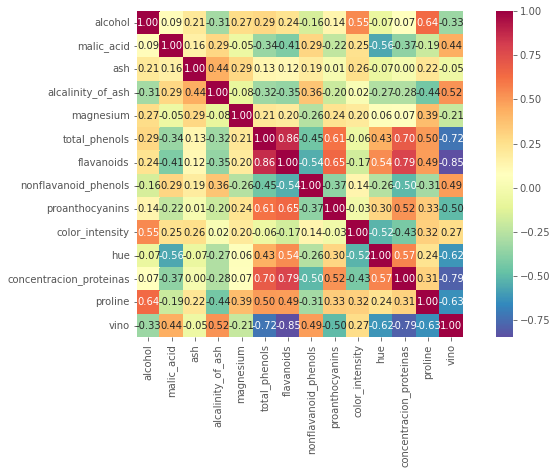

In [27]:
corrmat = df.corr()
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=df.columns, 
                 xticklabels=df.columns, 
                 cmap="Spectral_r")
plt.show()

# IV. Modelado

In [30]:
# Import libraries and classes required for this example:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


# Assign values to the X and y variables:
X = df.iloc[:, :-1].values
y = df['vino']

# Split dataset into random train and test subsets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 

# Standardize features by removing mean and scaling to unit variance:
#scaler = StandardScaler()
#scaler.fit(X_train)

#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test) 

# Use the KNN classifier to fit data:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train) 

# Predict y data with classifier: 
y_predict = classifier.predict(X_test)

# Print results: 
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict)) 

[[12  0  0]
 [ 3  5  6]
 [ 0  6  4]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        12
           1       0.45      0.36      0.40        14
           2       0.40      0.40      0.40        10

    accuracy                           0.58        36
   macro avg       0.55      0.59      0.56        36
weighted avg       0.55      0.58      0.56        36



In [31]:
# Standardize features by removing mean and scaling to unit variance:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

# Use the KNN classifier to fit data:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train) 

# Predict y data with classifier: 
y_predict = classifier.predict(X_test)

# Print results: 
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict)) 

[[12  0  0]
 [ 3 10  1]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        12
           1       1.00      0.71      0.83        14
           2       0.91      1.00      0.95        10

    accuracy                           0.89        36
   macro avg       0.90      0.90      0.89        36
weighted avg       0.91      0.89      0.88        36

